In [254]:
!pip3 install xgboost
from datetime import datetime
from patsy import dmatrices
from xgboost import XGBRegressor, plot_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [255]:
dataFrame = pd.read_csv('../Data/dados_limpos.csv')

In [256]:
dataFrame['tempo_resolucao'] = dataFrame['tempo_resolucao'] / (24 * 3600)

In [257]:
dataFrame = dataFrame.rename(columns={'devs_Carlos Pasquali': 'devs_CarlosPasquali'})
dataFrame = dataFrame.rename(columns={'parent_SA-114': 'parent_SA_114'})
dataFrame = dataFrame.rename(columns={'parent_SA-116': 'parent_SA_116','parent_SA-117': 'parent_SA_117','parent_SA-2': 'parent_SA_2','parent_SA-2859': 'parent_SA_2859','parent_SA-3': 'parent_SA_3','parent_SA-3012': 'parent_SA_3012','parent_SA-3642': 'parent_SA_3642','parent_SA-3702': 'parent_SA_3702','parent_SA-3887': 'parent_SA_3887','parent_SA-3947': 'parent_SA_3947','parent_SA-420': 'parent_SA_420','assignee_Donavan Marques': 'assignee_DonavanMarques','assignee_Jean Carlos': 'assignee_JeanCarlos','assignee_Yan Fagundes': 'assignee_YanFagundes','devs_Jean Carlos': 'devs_JeanCarlos','devs_Jorge Andrade': 'devs_JorgeAndrade','devs_Kauã Librelato da Costa': 'devs_KauãLibrelatodaCosta','devs_Luiz Gustavo': 'devs_LuizGustavo','devs_Thiago Meller Casagrande': 'devs_ThiagoMellerCasagrande'})

In [258]:
dataFrame

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,...,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
0,1,0.311968,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0.309005,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,1,0.325440,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1.800081,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,1,1.799954,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,3,13.792662,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
161,1,8.038461,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
162,1,1.000000,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
163,9,7.131076,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [259]:
#Q1
Q1 = np.percentile(dataFrame['tempo_resolucao'],25,interpolation='midpoint')
#Q3
Q3 = np.percentile(dataFrame['tempo_resolucao'],75,interpolation='midpoint')
#Intervalo do quartil
IQR = Q3 - Q1
print('Primeiro quartil:',Q1)
print('Terceiro quartil:',Q3)
print('Intervalo do quartil:',IQR)

Primeiro quartil: 0.08873842592592593
Terceiro quartil: 6.004004629629629
Intervalo do quartil: 5.915266203703704


C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_9040\3880516625.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(dataFrame['tempo_resolucao'],25,interpolation='midpoint')
C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_9040\3880516625.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(dataFrame['tempo_resolucao'],75,interpolation='midpoint')


In [260]:
#Valores exluidos
Superior = dataFrame['tempo_resolucao'] >= Q3 + 1.5 * IQR
Inferior = dataFrame['tempo_resolucao'] <= Q1 - 1.5 * IQR
print('Valores outliers superior:',np.where(Superior))
print('Valores outliers inferior:',np.where(Inferior))

Valores outliers superior: (array([ 66,  72,  73,  81,  82, 116, 117, 118, 119, 120, 121, 123, 156],
      dtype=int64),)
Valores outliers inferior: (array([], dtype=int64),)


In [261]:
#Deletando outliers/não existe outliers inferiores
Maior = Q3 + 1.5 * IQR

dados_superiores = np.where(dataFrame['tempo_resolucao'] >= Maior)
dataFrame = dataFrame.drop(dados_superiores[0])
dataFrame

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,...,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
0,1,0.311968,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0.309005,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,1,0.325440,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1.800081,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,1,1.799954,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,3,13.792662,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
161,1,8.038461,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
162,1,1.000000,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
163,9,7.131076,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [262]:
# Função para simplificar a visualização da comparação entre real e previsto
def plot_comparativo_real_previsto(df_teste, y_teste, predictions, desenvolvedor):
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(y_teste, label='Real', marker='o')
    ax.plot(predictions, label='Previsto', marker='x')
    ax.legend()
    ax.set_title(f'Comparativo Real vs. Previsto para {desenvolvedor}')
    ax.set_xlabel('Amostra')
    ax.set_ylabel('Tempo de Resolução')
    plt.show()

In [263]:
#devs_CarlosPasquali
desenvolvedor = 'Desenvolvedor A'

Text(0.5, 1.0, 'Tempo de resolução')

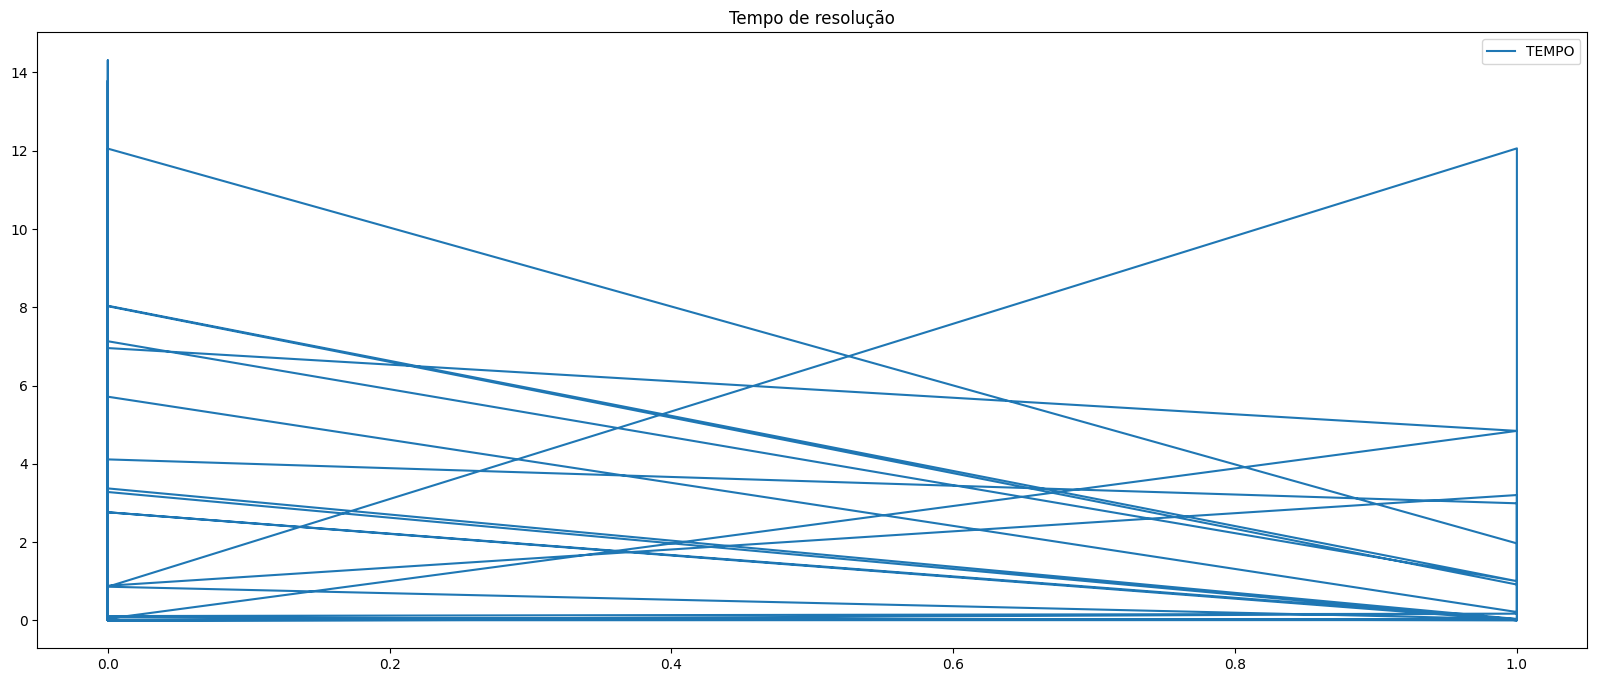

In [264]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_CarlosPasquali'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [265]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=122
Teste=30


In [266]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')



In [267]:
model = XGBRegressor(verbosity=0, n_jobs = -1 ,eval_metric='rmse')
model.fit(X_treino, y_treino,verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

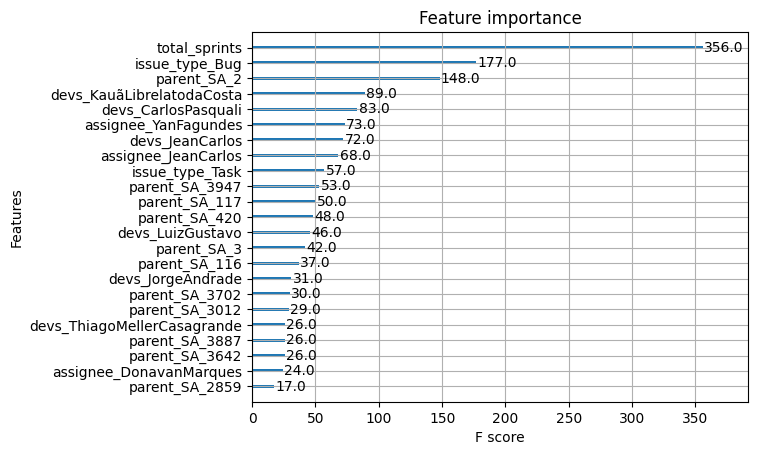

In [268]:
plot_importance(model)

In [269]:
score = model.score(X_treino, y_treino)
score

0.8385041737954014

In [270]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

30

Text(0.5, 1.0, 'Tempo sprint')

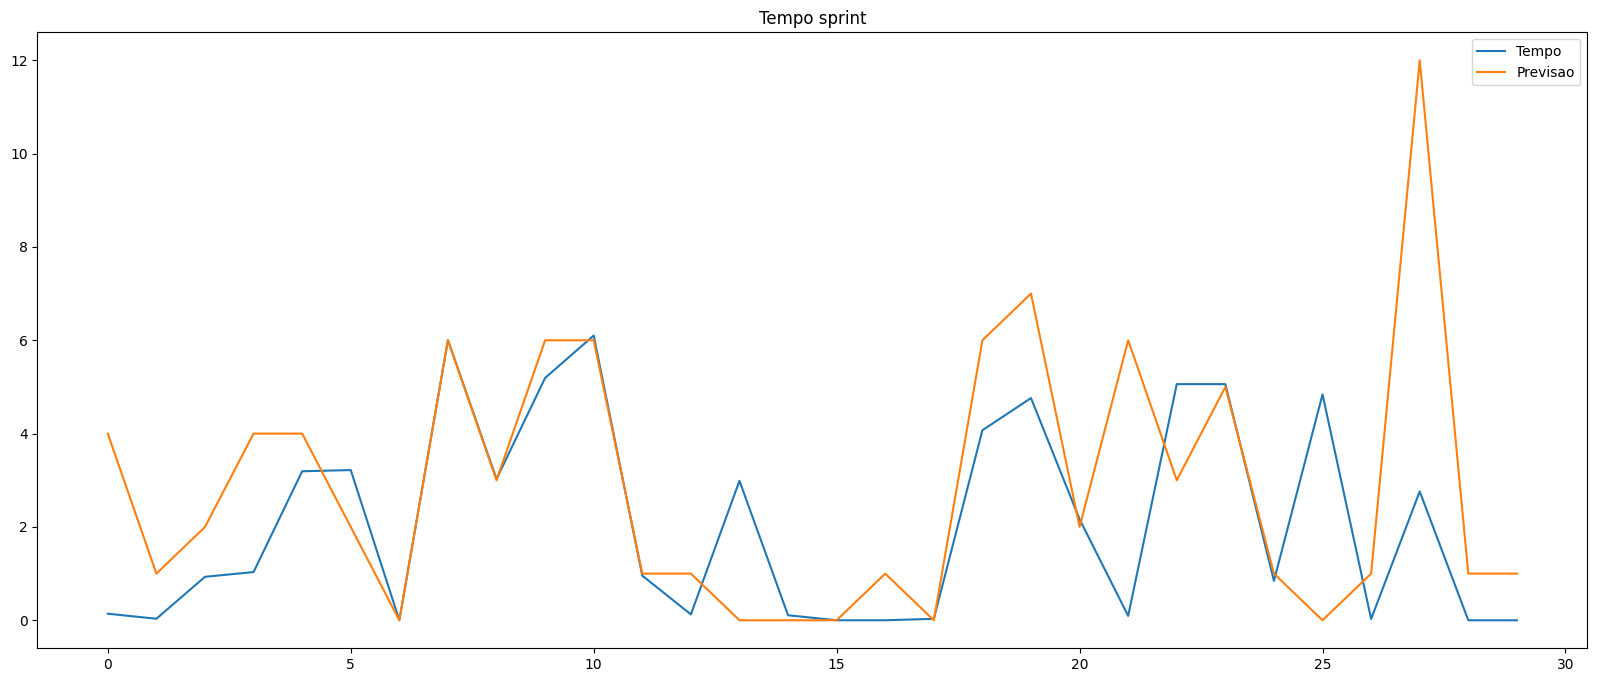

In [271]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [272]:
y_teste = np.array(y_teste)
predictions = np.array(predictions)
 
MSE = np.square(np.subtract(y_teste, predictions)).mean()
RMSE = np.sqrt(MSE)
print('RMSE:')
print(RMSE)

RMSE:
3.6185897334328967


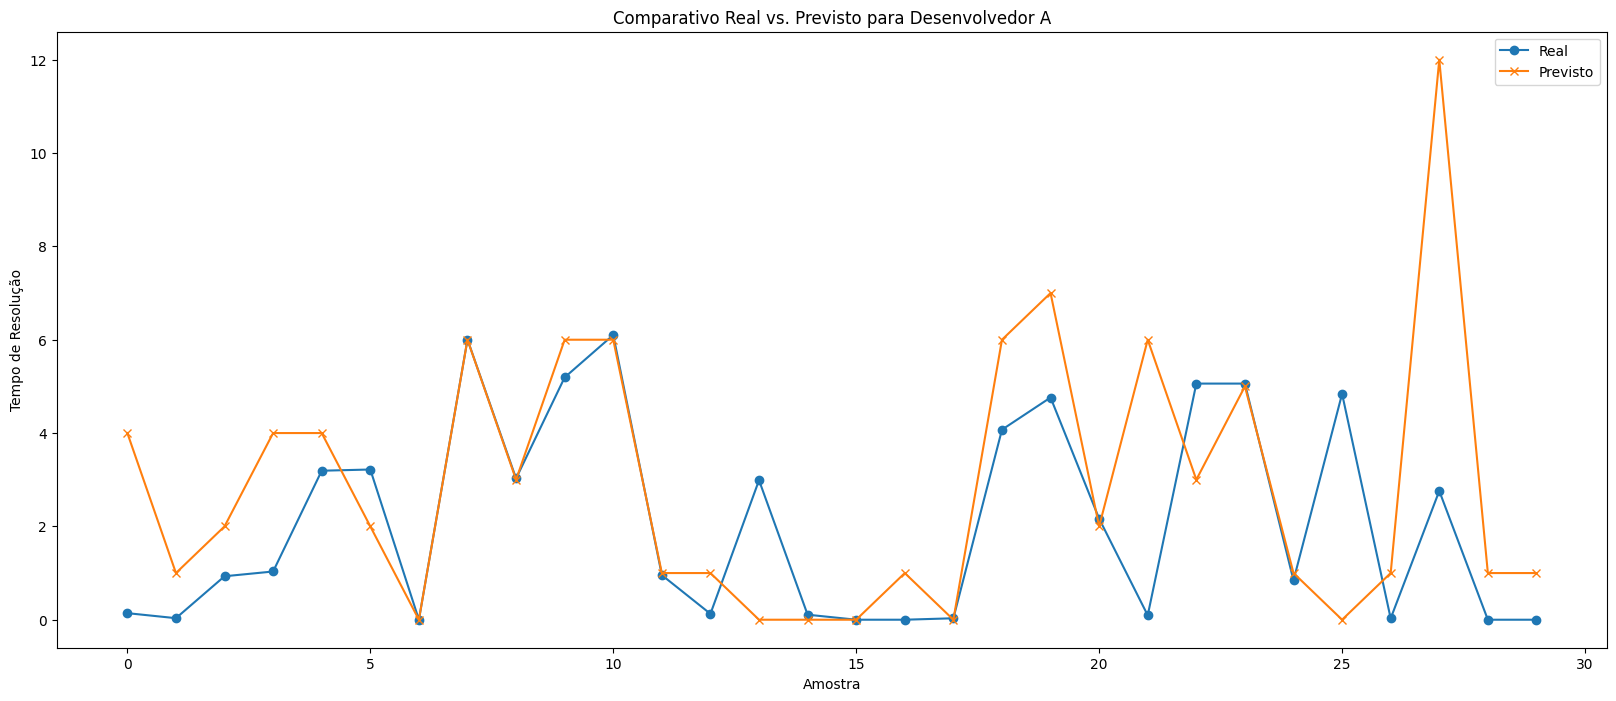

In [273]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]

plot_comparativo_real_previsto(df_teste, y_teste, predictions, desenvolvedor)

In [274]:
#devs_JeanCarlos

Text(0.5, 1.0, 'Tempo de resolução')

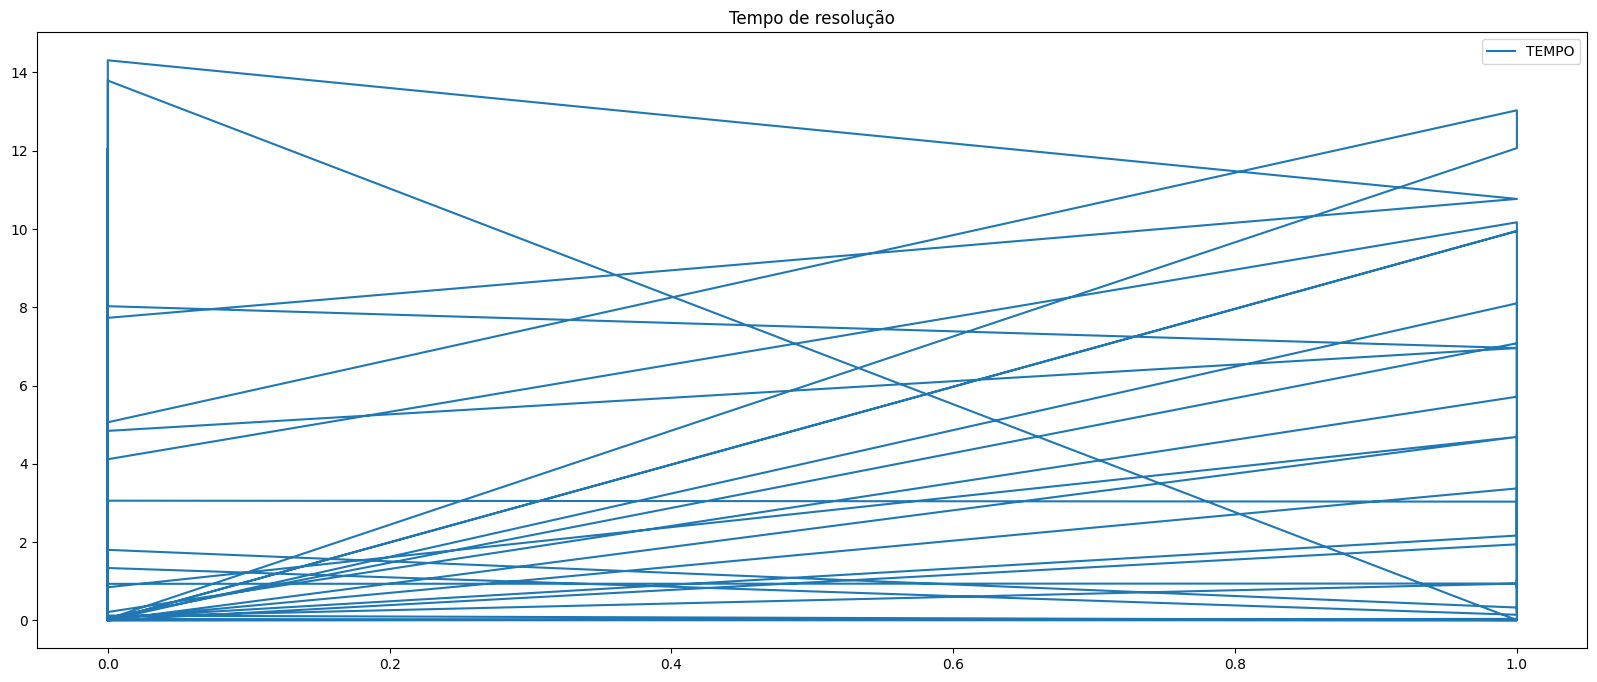

In [275]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_JeanCarlos'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [276]:
dataFrame.corr()

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,...,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.186527,0.063011,0.113924,-0.101581,-0.091567,0.353517,-0.060833,0.084136,0.014909,...,-0.059033,-0.081703,0.069390,-0.132091,-0.098172,0.062098,0.144591,-0.059033,-0.020645,0.113692
tempo_resolucao,0.186527,1.000000,0.033134,-0.171151,-0.085800,0.116433,0.163962,-0.008424,0.059334,0.059221,...,0.016456,0.022111,-0.227243,0.171254,-0.112831,0.256990,-0.070936,-0.116552,0.150962,-0.270541
parent_SA_114,0.063011,0.033134,1.000000,-0.044541,-0.061996,-0.129394,-0.028765,-0.056622,-0.037387,-0.023408,...,-0.028765,0.184835,-0.094216,-0.106754,-0.100526,0.370645,-0.085599,-0.028765,0.237712,-0.189795
parent_SA_116,0.113924,-0.171151,-0.044541,1.000000,-0.067194,-0.140242,-0.031177,-0.061369,-0.040522,-0.025371,...,-0.031177,0.074243,-0.102116,-0.115704,-0.108955,-0.120173,0.520350,-0.031177,-0.060228,0.108856
parent_SA_117,-0.101581,-0.085800,-0.061996,-0.067194,1.000000,-0.195200,-0.043394,-0.085418,-0.056401,-0.035313,...,-0.043394,0.278837,0.411818,-0.161045,0.084769,-0.167265,-0.129132,-0.043394,-0.070216,0.138041
parent_SA_2,-0.091567,0.116433,-0.129394,-0.140242,-0.195200,1.000000,-0.090569,-0.178279,-0.117717,-0.073703,...,0.222307,0.494559,-0.296648,0.719469,-0.316516,-0.280190,0.094810,0.222307,0.190207,-0.045144
parent_SA_2859,0.353517,0.163962,-0.028765,-0.031177,-0.043394,-0.090569,1.000000,-0.039633,-0.026169,-0.016385,...,-0.020134,-0.155626,-0.065947,-0.074722,-0.070364,0.259434,-0.059915,-0.020134,0.166387,-0.132848
parent_SA_3,-0.060833,-0.008424,-0.056622,-0.061369,-0.085418,-0.178279,-0.039633,1.000000,-0.051513,-0.032252,...,-0.039633,-0.204337,0.135931,-0.147086,0.308070,-0.152766,-0.117939,-0.039633,0.224663,-0.210607
parent_SA_3012,0.084136,0.059334,-0.037387,-0.040522,-0.056401,-0.117717,-0.026169,-0.051513,1.000000,-0.021296,...,-0.026169,0.168156,-0.085714,-0.097120,0.371917,-0.100871,-0.077875,-0.026169,0.066844,-0.024806
parent_SA_3642,0.014909,0.059221,-0.023408,-0.025371,-0.035313,-0.073703,-0.016385,-0.032252,-0.021296,1.000000,...,-0.016385,-0.010681,-0.053666,-0.060807,-0.057260,-0.063155,0.273464,-0.016385,-0.098473,0.123334


In [277]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=117
Teste=35


In [278]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')

In [279]:
model = XGBRegressor(verbosity=0, n_jobs = -1 ,eval_metric='rmse')
model.fit(X_treino, y_treino,verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

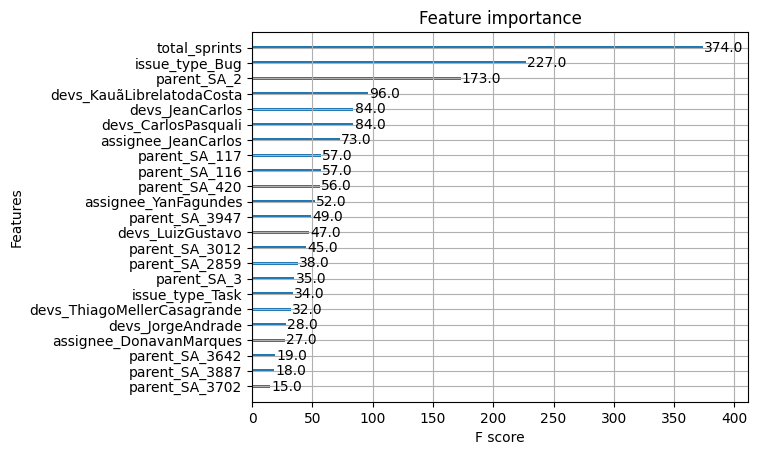

In [280]:
plot_importance(model)

In [281]:
score = model.score(X_treino, y_treino)
score

0.8784108522766939

In [282]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

35

Text(0.5, 1.0, 'Tempo sprint')

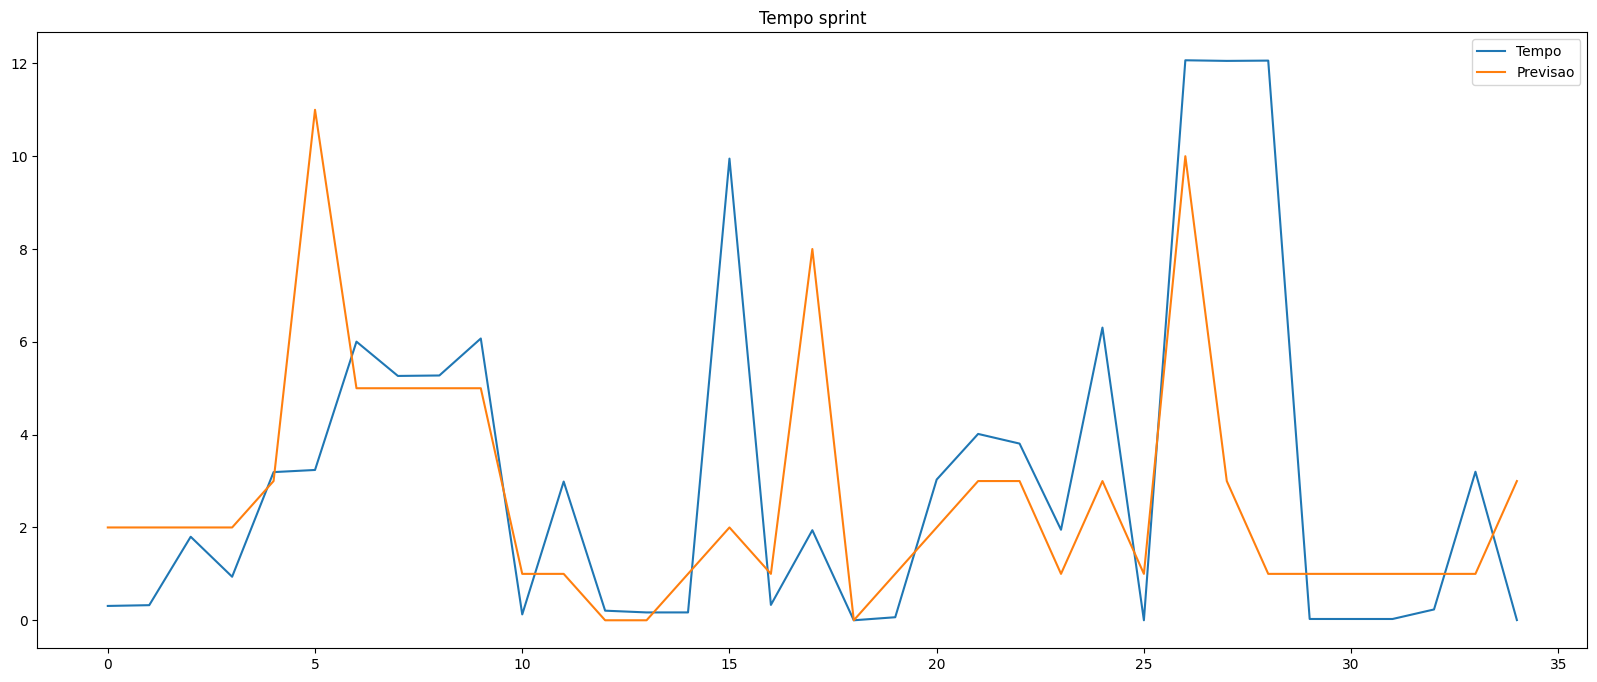

In [283]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [284]:
y_teste = np.array(y_teste)
predictions = np.array(predictions)
 
MSE = np.square(np.subtract(y_teste, predictions)).mean()
RMSE = np.sqrt(MSE)
print('RMSE:')
print(RMSE)

RMSE:
4.4974549819392875


In [285]:
#devs_JorgeAndrade
desenvolvedor = 'Desenvolvedor B'

Text(0.5, 1.0, 'Tempo de resolução')

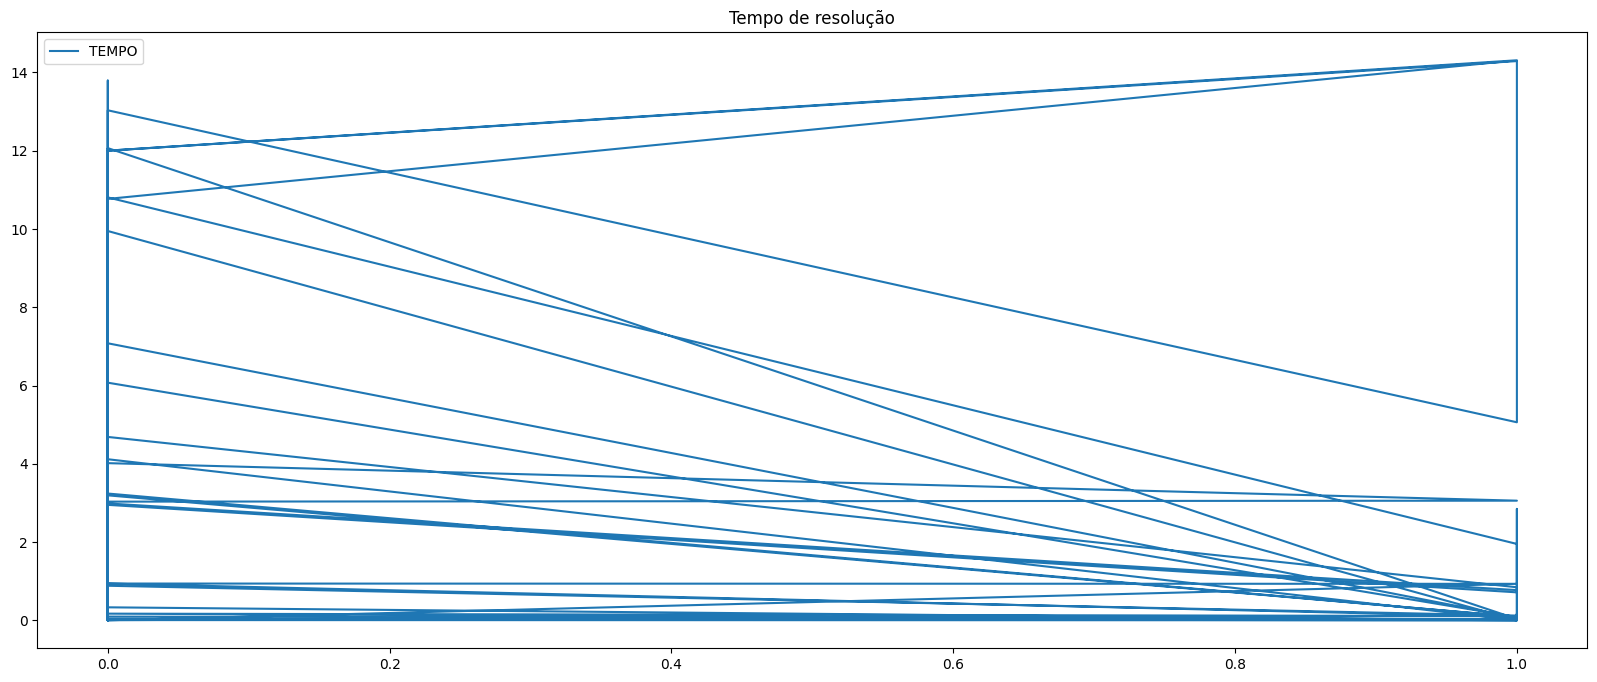

In [286]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_JorgeAndrade'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [287]:
dataFrame.corr()

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,...,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.186527,0.063011,0.113924,-0.101581,-0.091567,0.353517,-0.060833,0.084136,0.014909,...,-0.059033,-0.081703,0.069390,-0.132091,-0.098172,0.062098,0.144591,-0.059033,-0.020645,0.113692
tempo_resolucao,0.186527,1.000000,0.033134,-0.171151,-0.085800,0.116433,0.163962,-0.008424,0.059334,0.059221,...,0.016456,0.022111,-0.227243,0.171254,-0.112831,0.256990,-0.070936,-0.116552,0.150962,-0.270541
parent_SA_114,0.063011,0.033134,1.000000,-0.044541,-0.061996,-0.129394,-0.028765,-0.056622,-0.037387,-0.023408,...,-0.028765,0.184835,-0.094216,-0.106754,-0.100526,0.370645,-0.085599,-0.028765,0.237712,-0.189795
parent_SA_116,0.113924,-0.171151,-0.044541,1.000000,-0.067194,-0.140242,-0.031177,-0.061369,-0.040522,-0.025371,...,-0.031177,0.074243,-0.102116,-0.115704,-0.108955,-0.120173,0.520350,-0.031177,-0.060228,0.108856
parent_SA_117,-0.101581,-0.085800,-0.061996,-0.067194,1.000000,-0.195200,-0.043394,-0.085418,-0.056401,-0.035313,...,-0.043394,0.278837,0.411818,-0.161045,0.084769,-0.167265,-0.129132,-0.043394,-0.070216,0.138041
parent_SA_2,-0.091567,0.116433,-0.129394,-0.140242,-0.195200,1.000000,-0.090569,-0.178279,-0.117717,-0.073703,...,0.222307,0.494559,-0.296648,0.719469,-0.316516,-0.280190,0.094810,0.222307,0.190207,-0.045144
parent_SA_2859,0.353517,0.163962,-0.028765,-0.031177,-0.043394,-0.090569,1.000000,-0.039633,-0.026169,-0.016385,...,-0.020134,-0.155626,-0.065947,-0.074722,-0.070364,0.259434,-0.059915,-0.020134,0.166387,-0.132848
parent_SA_3,-0.060833,-0.008424,-0.056622,-0.061369,-0.085418,-0.178279,-0.039633,1.000000,-0.051513,-0.032252,...,-0.039633,-0.204337,0.135931,-0.147086,0.308070,-0.152766,-0.117939,-0.039633,0.224663,-0.210607
parent_SA_3012,0.084136,0.059334,-0.037387,-0.040522,-0.056401,-0.117717,-0.026169,-0.051513,1.000000,-0.021296,...,-0.026169,0.168156,-0.085714,-0.097120,0.371917,-0.100871,-0.077875,-0.026169,0.066844,-0.024806
parent_SA_3642,0.014909,0.059221,-0.023408,-0.025371,-0.035313,-0.073703,-0.016385,-0.032252,-0.021296,1.000000,...,-0.016385,-0.010681,-0.053666,-0.060807,-0.057260,-0.063155,0.273464,-0.016385,-0.098473,0.123334


In [288]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=119
Teste=33


In [289]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')

In [290]:
model = XGBRegressor(verbosity=0, n_jobs = -1 ,eval_metric='rmse')
model.fit(X_treino, y_treino,verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

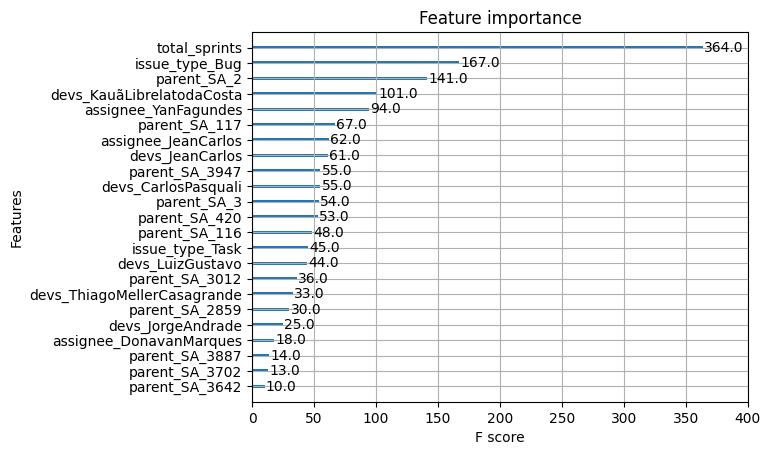

In [291]:
plot_importance(model)

In [292]:
score = model.score(X_treino, y_treino)
score

0.7994568902268694

In [293]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

33

Text(0.5, 1.0, 'Tempo sprint')

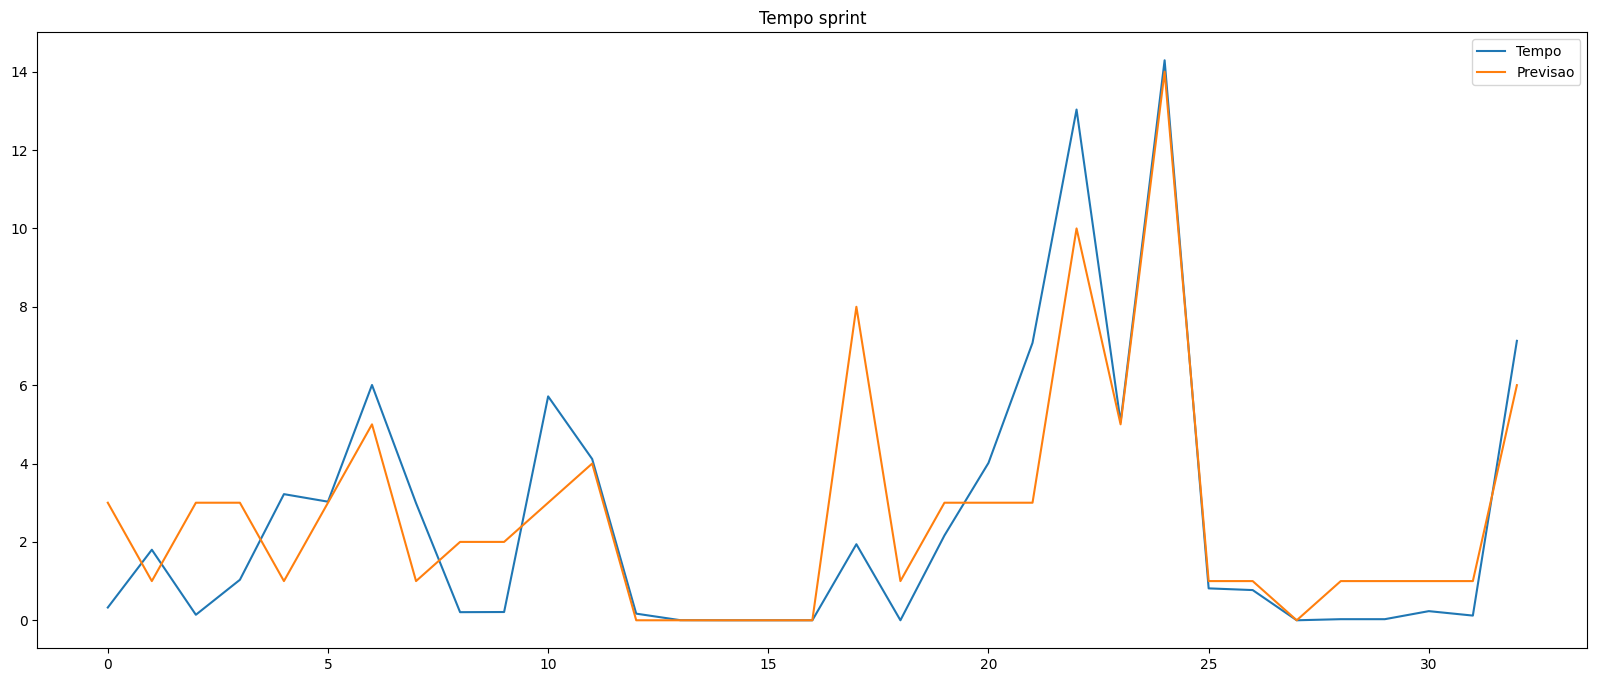

In [294]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [295]:
y_teste = np.array(y_teste)
predictions = np.array(predictions)
 
MSE = np.square(np.subtract(y_teste, predictions)).mean()
RMSE = np.sqrt(MSE)
print('RMSE:')
print(RMSE)

RMSE:
4.7031224126435065


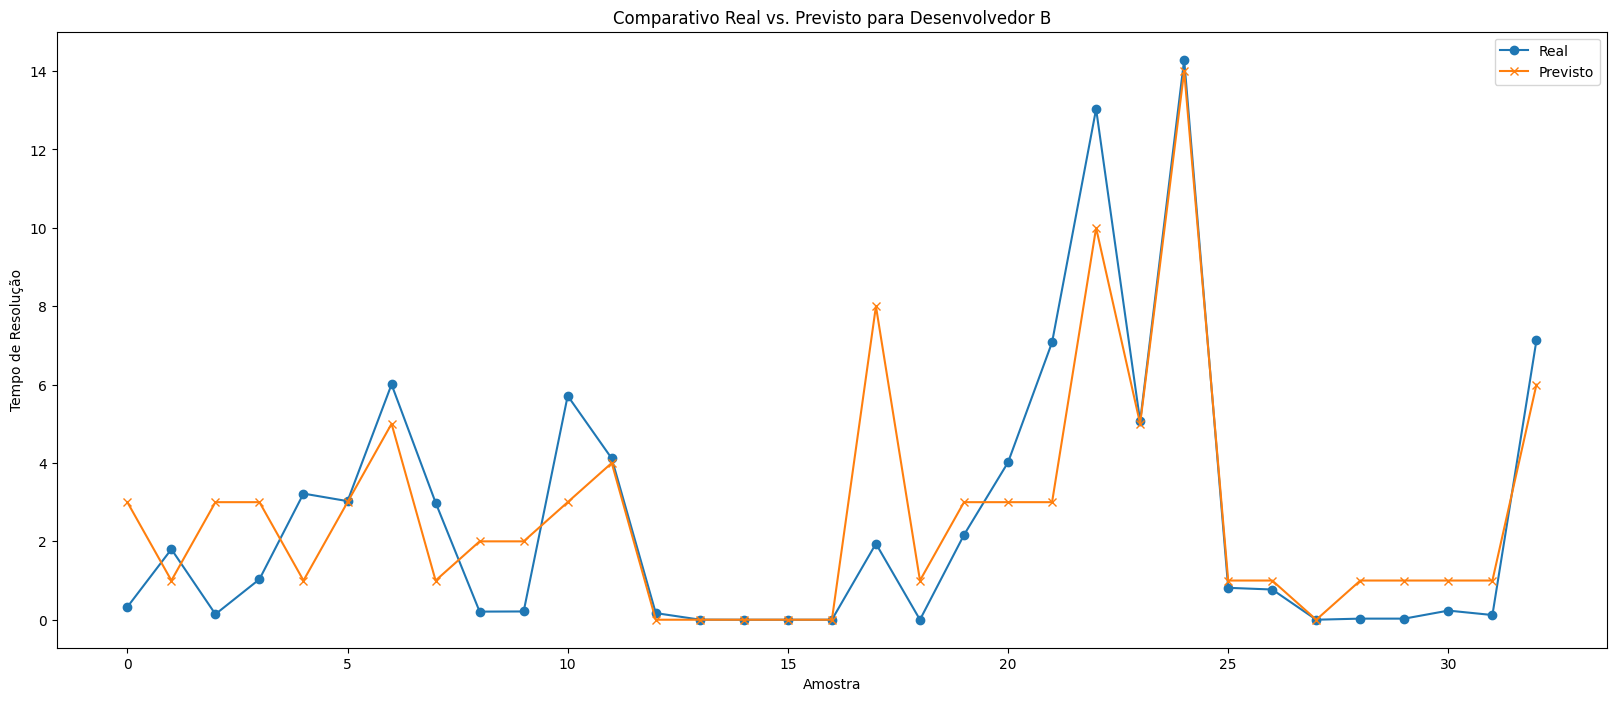

In [296]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]

plot_comparativo_real_previsto(df_teste, y_teste, predictions, desenvolvedor)

In [297]:
#devs_KauãLibrelatodaCosta

Text(0.5, 1.0, 'Tempo de resolução')

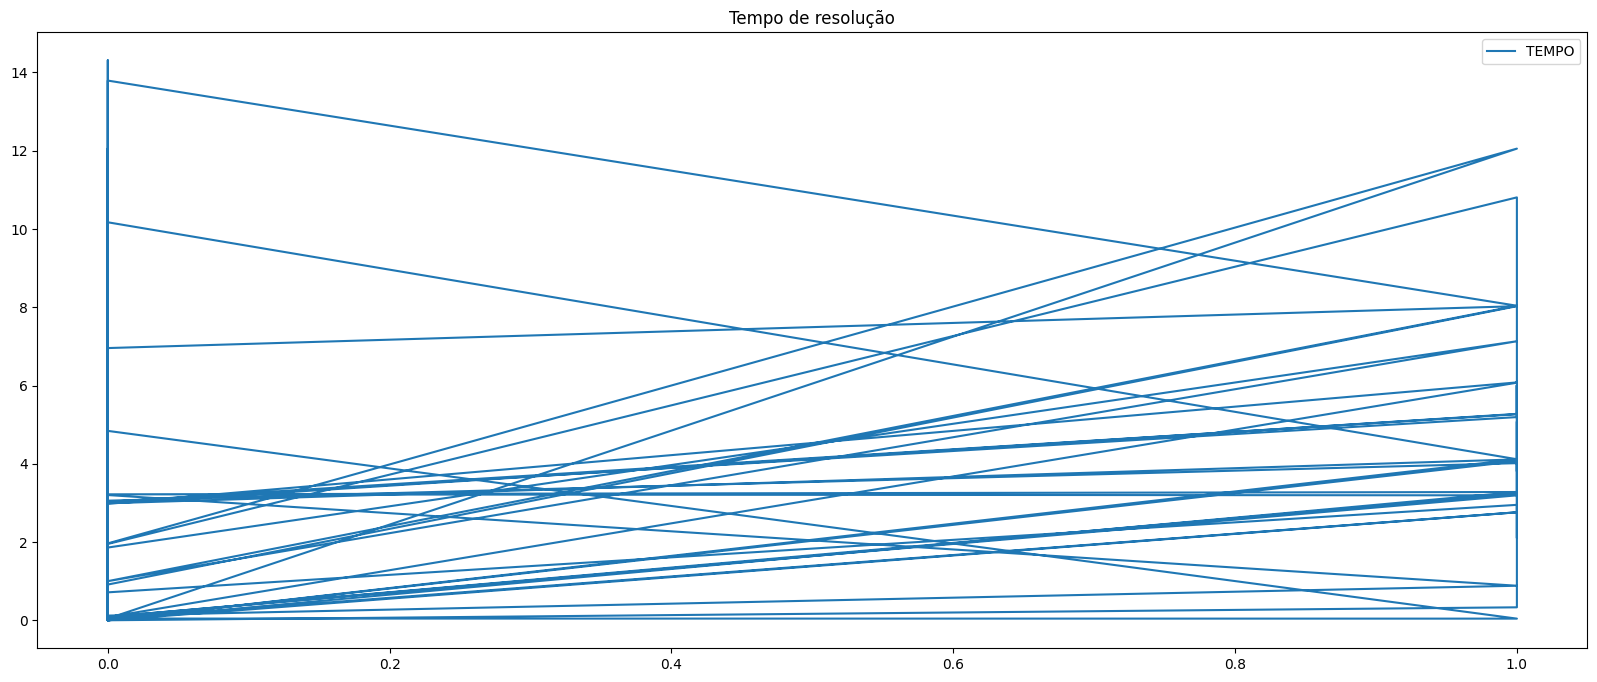

In [298]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_KauãLibrelatodaCosta'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [299]:
dataFrame.corr()

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,...,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.186527,0.063011,0.113924,-0.101581,-0.091567,0.353517,-0.060833,0.084136,0.014909,...,-0.059033,-0.081703,0.069390,-0.132091,-0.098172,0.062098,0.144591,-0.059033,-0.020645,0.113692
tempo_resolucao,0.186527,1.000000,0.033134,-0.171151,-0.085800,0.116433,0.163962,-0.008424,0.059334,0.059221,...,0.016456,0.022111,-0.227243,0.171254,-0.112831,0.256990,-0.070936,-0.116552,0.150962,-0.270541
parent_SA_114,0.063011,0.033134,1.000000,-0.044541,-0.061996,-0.129394,-0.028765,-0.056622,-0.037387,-0.023408,...,-0.028765,0.184835,-0.094216,-0.106754,-0.100526,0.370645,-0.085599,-0.028765,0.237712,-0.189795
parent_SA_116,0.113924,-0.171151,-0.044541,1.000000,-0.067194,-0.140242,-0.031177,-0.061369,-0.040522,-0.025371,...,-0.031177,0.074243,-0.102116,-0.115704,-0.108955,-0.120173,0.520350,-0.031177,-0.060228,0.108856
parent_SA_117,-0.101581,-0.085800,-0.061996,-0.067194,1.000000,-0.195200,-0.043394,-0.085418,-0.056401,-0.035313,...,-0.043394,0.278837,0.411818,-0.161045,0.084769,-0.167265,-0.129132,-0.043394,-0.070216,0.138041
parent_SA_2,-0.091567,0.116433,-0.129394,-0.140242,-0.195200,1.000000,-0.090569,-0.178279,-0.117717,-0.073703,...,0.222307,0.494559,-0.296648,0.719469,-0.316516,-0.280190,0.094810,0.222307,0.190207,-0.045144
parent_SA_2859,0.353517,0.163962,-0.028765,-0.031177,-0.043394,-0.090569,1.000000,-0.039633,-0.026169,-0.016385,...,-0.020134,-0.155626,-0.065947,-0.074722,-0.070364,0.259434,-0.059915,-0.020134,0.166387,-0.132848
parent_SA_3,-0.060833,-0.008424,-0.056622,-0.061369,-0.085418,-0.178279,-0.039633,1.000000,-0.051513,-0.032252,...,-0.039633,-0.204337,0.135931,-0.147086,0.308070,-0.152766,-0.117939,-0.039633,0.224663,-0.210607
parent_SA_3012,0.084136,0.059334,-0.037387,-0.040522,-0.056401,-0.117717,-0.026169,-0.051513,1.000000,-0.021296,...,-0.026169,0.168156,-0.085714,-0.097120,0.371917,-0.100871,-0.077875,-0.026169,0.066844,-0.024806
parent_SA_3642,0.014909,0.059221,-0.023408,-0.025371,-0.035313,-0.073703,-0.016385,-0.032252,-0.021296,1.000000,...,-0.016385,-0.010681,-0.053666,-0.060807,-0.057260,-0.063155,0.273464,-0.016385,-0.098473,0.123334


In [300]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=114
Teste=38


In [301]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')

In [302]:
model = XGBRegressor(verbosity=0, n_jobs = -1 ,eval_metric='rmse')
model.fit(X_treino, y_treino,verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

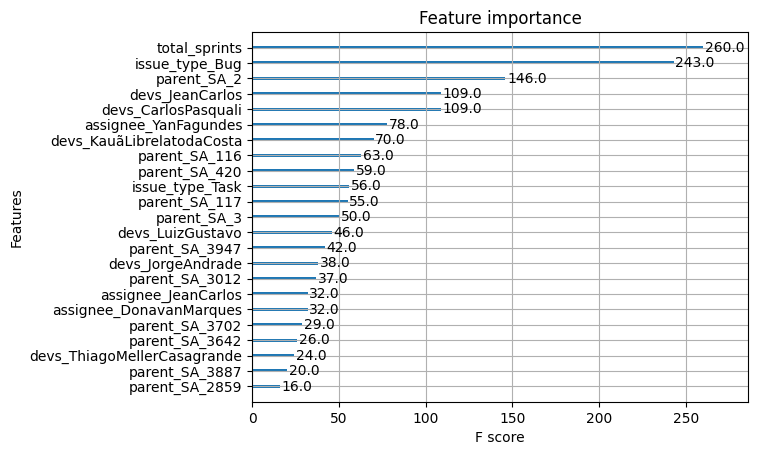

In [303]:
plot_importance(model)

In [304]:
score = model.score(X_treino, y_treino)
score

0.8660441933508829

In [305]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

38

Text(0.5, 1.0, 'Tempo sprint')

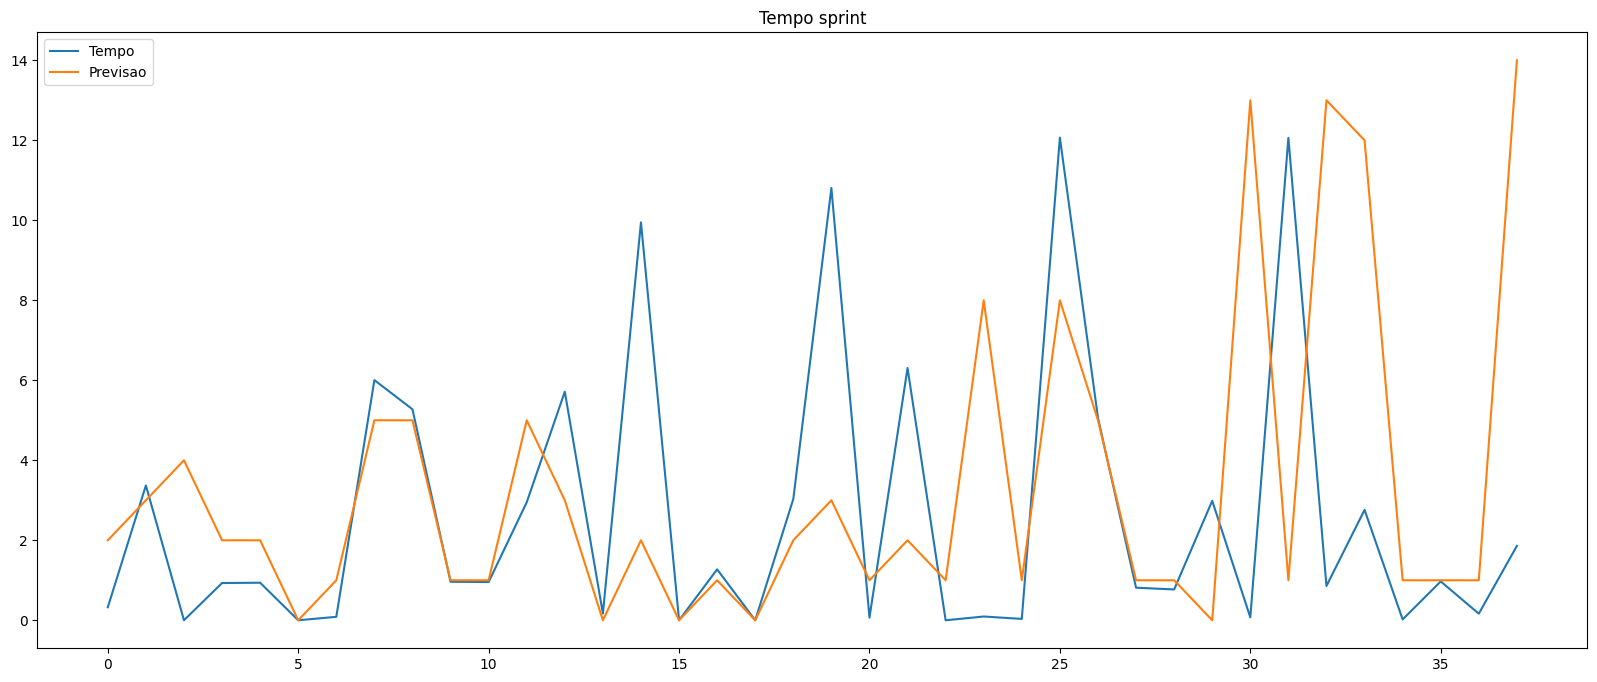

In [306]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [307]:
y_teste = np.array(y_teste)
predictions = np.array(predictions)
 
MSE = np.square(np.subtract(y_teste, predictions)).mean()
RMSE = np.sqrt(MSE)
print('RMSE:')
print(RMSE)

RMSE:
5.25926681991422


In [308]:
#devs_LuizGustavo

Text(0.5, 1.0, 'Tempo de resolução')

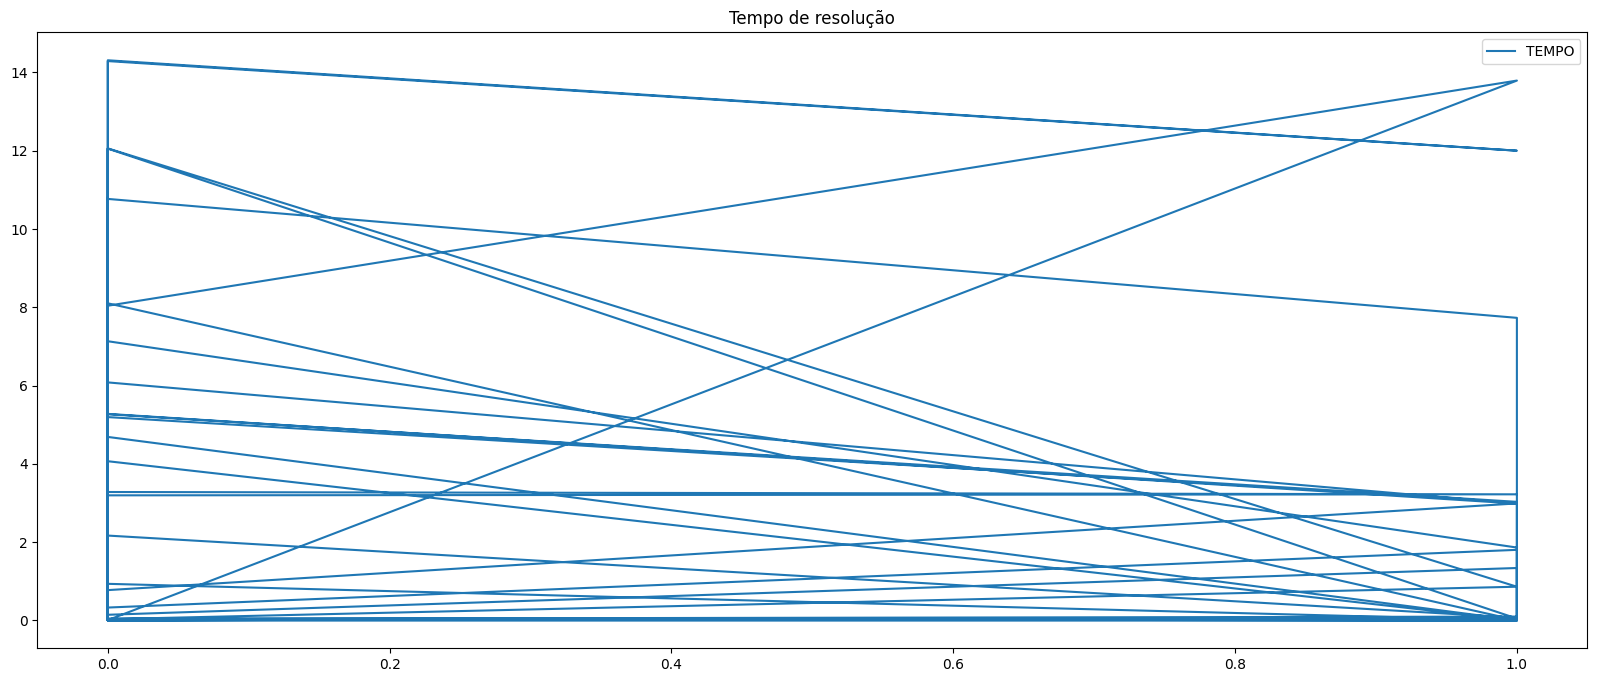

In [309]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_LuizGustavo'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [310]:
dataFrame.corr()

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,...,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.186527,0.063011,0.113924,-0.101581,-0.091567,0.353517,-0.060833,0.084136,0.014909,...,-0.059033,-0.081703,0.069390,-0.132091,-0.098172,0.062098,0.144591,-0.059033,-0.020645,0.113692
tempo_resolucao,0.186527,1.000000,0.033134,-0.171151,-0.085800,0.116433,0.163962,-0.008424,0.059334,0.059221,...,0.016456,0.022111,-0.227243,0.171254,-0.112831,0.256990,-0.070936,-0.116552,0.150962,-0.270541
parent_SA_114,0.063011,0.033134,1.000000,-0.044541,-0.061996,-0.129394,-0.028765,-0.056622,-0.037387,-0.023408,...,-0.028765,0.184835,-0.094216,-0.106754,-0.100526,0.370645,-0.085599,-0.028765,0.237712,-0.189795
parent_SA_116,0.113924,-0.171151,-0.044541,1.000000,-0.067194,-0.140242,-0.031177,-0.061369,-0.040522,-0.025371,...,-0.031177,0.074243,-0.102116,-0.115704,-0.108955,-0.120173,0.520350,-0.031177,-0.060228,0.108856
parent_SA_117,-0.101581,-0.085800,-0.061996,-0.067194,1.000000,-0.195200,-0.043394,-0.085418,-0.056401,-0.035313,...,-0.043394,0.278837,0.411818,-0.161045,0.084769,-0.167265,-0.129132,-0.043394,-0.070216,0.138041
parent_SA_2,-0.091567,0.116433,-0.129394,-0.140242,-0.195200,1.000000,-0.090569,-0.178279,-0.117717,-0.073703,...,0.222307,0.494559,-0.296648,0.719469,-0.316516,-0.280190,0.094810,0.222307,0.190207,-0.045144
parent_SA_2859,0.353517,0.163962,-0.028765,-0.031177,-0.043394,-0.090569,1.000000,-0.039633,-0.026169,-0.016385,...,-0.020134,-0.155626,-0.065947,-0.074722,-0.070364,0.259434,-0.059915,-0.020134,0.166387,-0.132848
parent_SA_3,-0.060833,-0.008424,-0.056622,-0.061369,-0.085418,-0.178279,-0.039633,1.000000,-0.051513,-0.032252,...,-0.039633,-0.204337,0.135931,-0.147086,0.308070,-0.152766,-0.117939,-0.039633,0.224663,-0.210607
parent_SA_3012,0.084136,0.059334,-0.037387,-0.040522,-0.056401,-0.117717,-0.026169,-0.051513,1.000000,-0.021296,...,-0.026169,0.168156,-0.085714,-0.097120,0.371917,-0.100871,-0.077875,-0.026169,0.066844,-0.024806
parent_SA_3642,0.014909,0.059221,-0.023408,-0.025371,-0.035313,-0.073703,-0.016385,-0.032252,-0.021296,1.000000,...,-0.016385,-0.010681,-0.053666,-0.060807,-0.057260,-0.063155,0.273464,-0.016385,-0.098473,0.123334


In [311]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=119
Teste=33


In [312]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')

In [313]:
model = XGBRegressor(verbosity=0, n_jobs = -1 ,eval_metric='rmse')
model.fit(X_treino, y_treino,verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

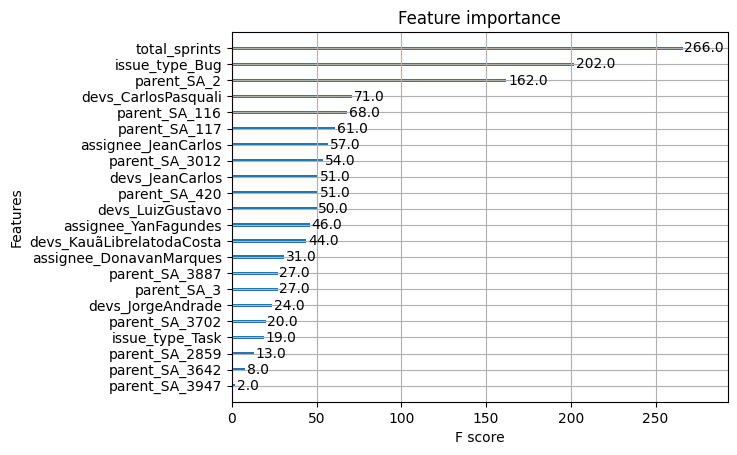

In [314]:
plot_importance(model)

In [315]:
score = model.score(X_treino, y_treino)
score

0.7936521008687593

In [316]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

33

Text(0.5, 1.0, 'Tempo sprint')

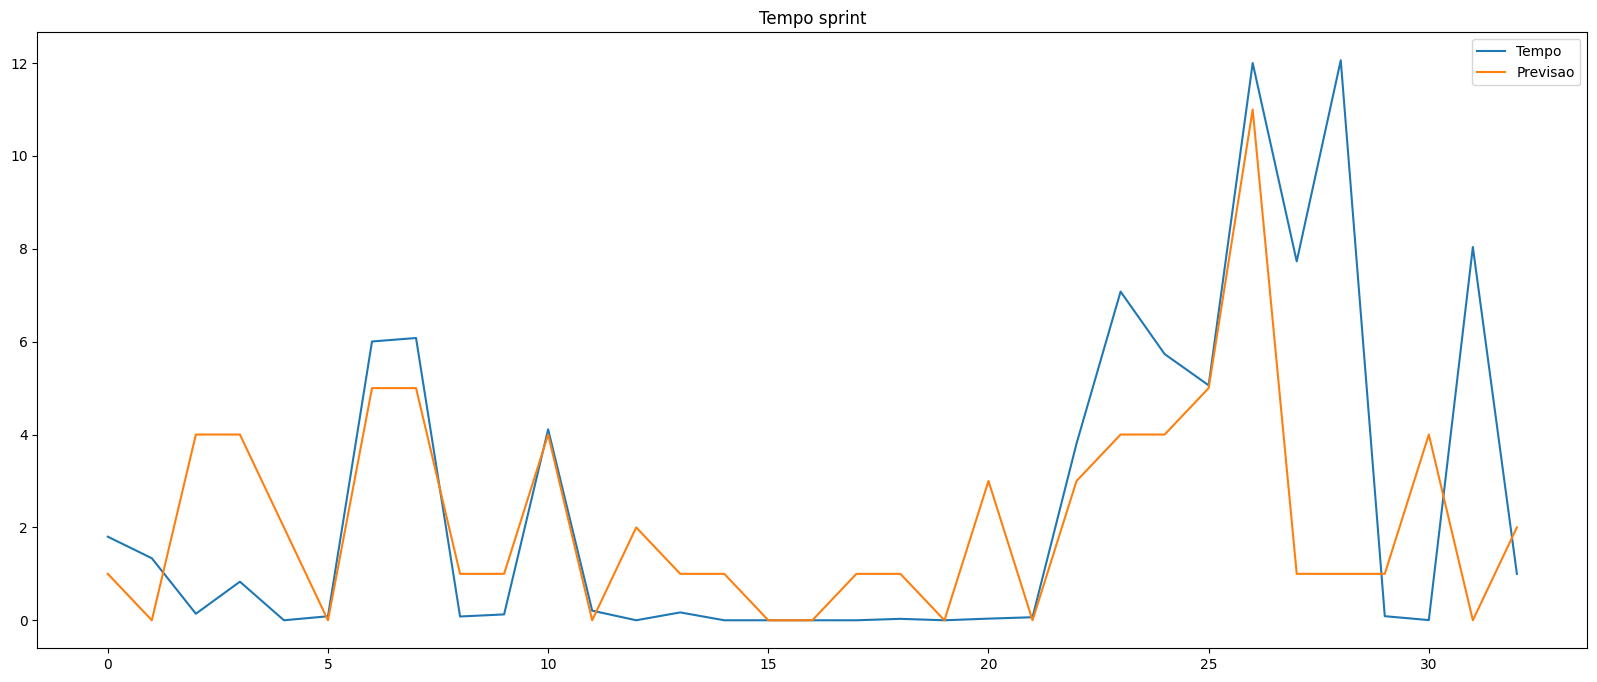

In [317]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [318]:
y_teste = np.array(y_teste)
predictions = np.array(predictions)
 
MSE = np.square(np.subtract(y_teste, predictions)).mean()
RMSE = np.sqrt(MSE)
print('RMSE:')
print(RMSE)

RMSE:
4.2654456959853055


In [319]:
#devs_ThiagoMellerCasagrande
desenvolvedor = "devs_ThiagoMellerCasagrande"

Text(0.5, 1.0, 'Tempo de resolução')

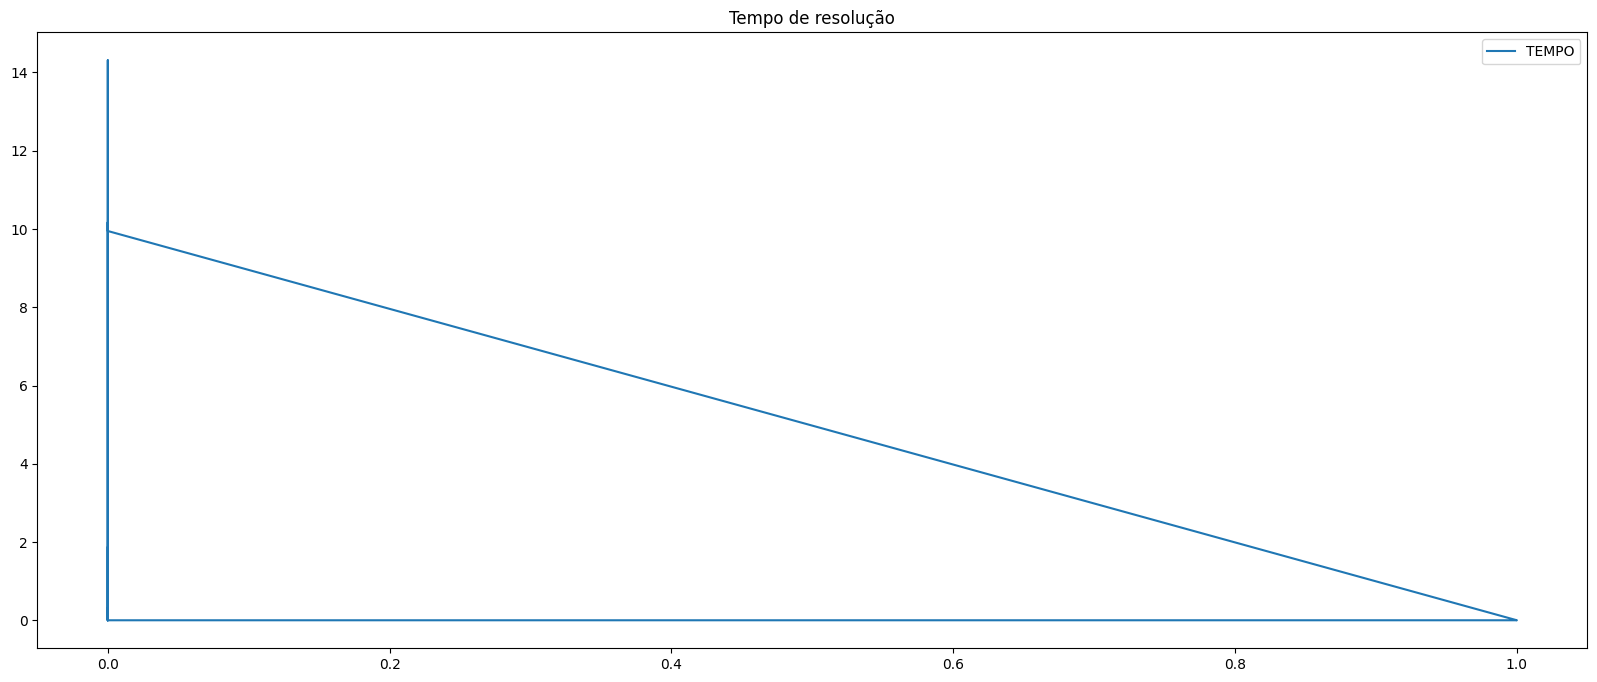

In [320]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(dataFrame['devs_ThiagoMellerCasagrande'].values, dataFrame['tempo_resolucao'].values,label='TEMPO')
ax.legend()
ax.set_title('Tempo de resolução')

In [321]:
dataFrame.corr()

,total_sprints,tempo_resolucao,parent_SA_114,parent_SA_116,parent_SA_117,parent_SA_2,parent_SA_2859,parent_SA_3,parent_SA_3012,parent_SA_3642,...,assignee_JeanCarlos,assignee_YanFagundes,devs_CarlosPasquali,devs_JeanCarlos,devs_JorgeAndrade,devs_KauãLibrelatodaCosta,devs_LuizGustavo,devs_ThiagoMellerCasagrande,issue_type_Bug,issue_type_Task
total_sprints,1.000000,0.186527,0.063011,0.113924,-0.101581,-0.091567,0.353517,-0.060833,0.084136,0.014909,...,-0.059033,-0.081703,0.069390,-0.132091,-0.098172,0.062098,0.144591,-0.059033,-0.020645,0.113692
tempo_resolucao,0.186527,1.000000,0.033134,-0.171151,-0.085800,0.116433,0.163962,-0.008424,0.059334,0.059221,...,0.016456,0.022111,-0.227243,0.171254,-0.112831,0.256990,-0.070936,-0.116552,0.150962,-0.270541
parent_SA_114,0.063011,0.033134,1.000000,-0.044541,-0.061996,-0.129394,-0.028765,-0.056622,-0.037387,-0.023408,...,-0.028765,0.184835,-0.094216,-0.106754,-0.100526,0.370645,-0.085599,-0.028765,0.237712,-0.189795
parent_SA_116,0.113924,-0.171151,-0.044541,1.000000,-0.067194,-0.140242,-0.031177,-0.061369,-0.040522,-0.025371,...,-0.031177,0.074243,-0.102116,-0.115704,-0.108955,-0.120173,0.520350,-0.031177,-0.060228,0.108856
parent_SA_117,-0.101581,-0.085800,-0.061996,-0.067194,1.000000,-0.195200,-0.043394,-0.085418,-0.056401,-0.035313,...,-0.043394,0.278837,0.411818,-0.161045,0.084769,-0.167265,-0.129132,-0.043394,-0.070216,0.138041
parent_SA_2,-0.091567,0.116433,-0.129394,-0.140242,-0.195200,1.000000,-0.090569,-0.178279,-0.117717,-0.073703,...,0.222307,0.494559,-0.296648,0.719469,-0.316516,-0.280190,0.094810,0.222307,0.190207,-0.045144
parent_SA_2859,0.353517,0.163962,-0.028765,-0.031177,-0.043394,-0.090569,1.000000,-0.039633,-0.026169,-0.016385,...,-0.020134,-0.155626,-0.065947,-0.074722,-0.070364,0.259434,-0.059915,-0.020134,0.166387,-0.132848
parent_SA_3,-0.060833,-0.008424,-0.056622,-0.061369,-0.085418,-0.178279,-0.039633,1.000000,-0.051513,-0.032252,...,-0.039633,-0.204337,0.135931,-0.147086,0.308070,-0.152766,-0.117939,-0.039633,0.224663,-0.210607
parent_SA_3012,0.084136,0.059334,-0.037387,-0.040522,-0.056401,-0.117717,-0.026169,-0.051513,1.000000,-0.021296,...,-0.026169,0.168156,-0.085714,-0.097120,0.371917,-0.100871,-0.077875,-0.026169,0.066844,-0.024806
parent_SA_3642,0.014909,0.059221,-0.023408,-0.025371,-0.035313,-0.073703,-0.016385,-0.032252,-0.021296,1.000000,...,-0.016385,-0.010681,-0.053666,-0.060807,-0.057260,-0.063155,0.273464,-0.016385,-0.098473,0.123334


In [322]:
selec = np.random.rand(len(dataFrame)) < 0.8
df_treino = dataFrame[selec]
df_teste = dataFrame[~selec]
print('treino=' + str(len(df_treino)))
print('Teste=' + str(len(df_teste)))

treino=121
Teste=31


In [323]:
expr = """tempo_resolucao ~ total_sprints + devs_CarlosPasquali + parent_SA_116 + parent_SA_117 + parent_SA_2 + parent_SA_2859 + parent_SA_3 + parent_SA_3012 + parent_SA_3642 + parent_SA_3702 + parent_SA_3887 + parent_SA_3947 + parent_SA_420 + assignee_DonavanMarques + assignee_JeanCarlos + assignee_YanFagundes + devs_JeanCarlos + devs_JorgeAndrade + devs_KauãLibrelatodaCosta + devs_LuizGustavo + devs_ThiagoMellerCasagrande + issue_type_Bug + issue_type_Task"""

y_treino,X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste,X_teste = dmatrices(expr, df_teste, return_type='dataframe')

In [324]:
model = XGBRegressor(verbosity=0, n_jobs = -1 ,eval_metric='rmse')
model.fit(X_treino, y_treino,verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

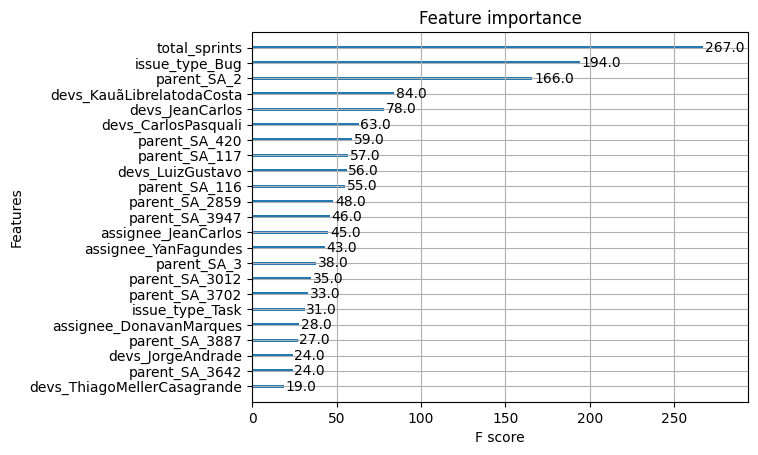

In [325]:
plot_importance(model)

In [326]:
score = model.score(X_treino, y_treino)
score

0.808312635468707

In [327]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]
len(predictions)

31

Text(0.5, 1.0, 'Tempo sprint')

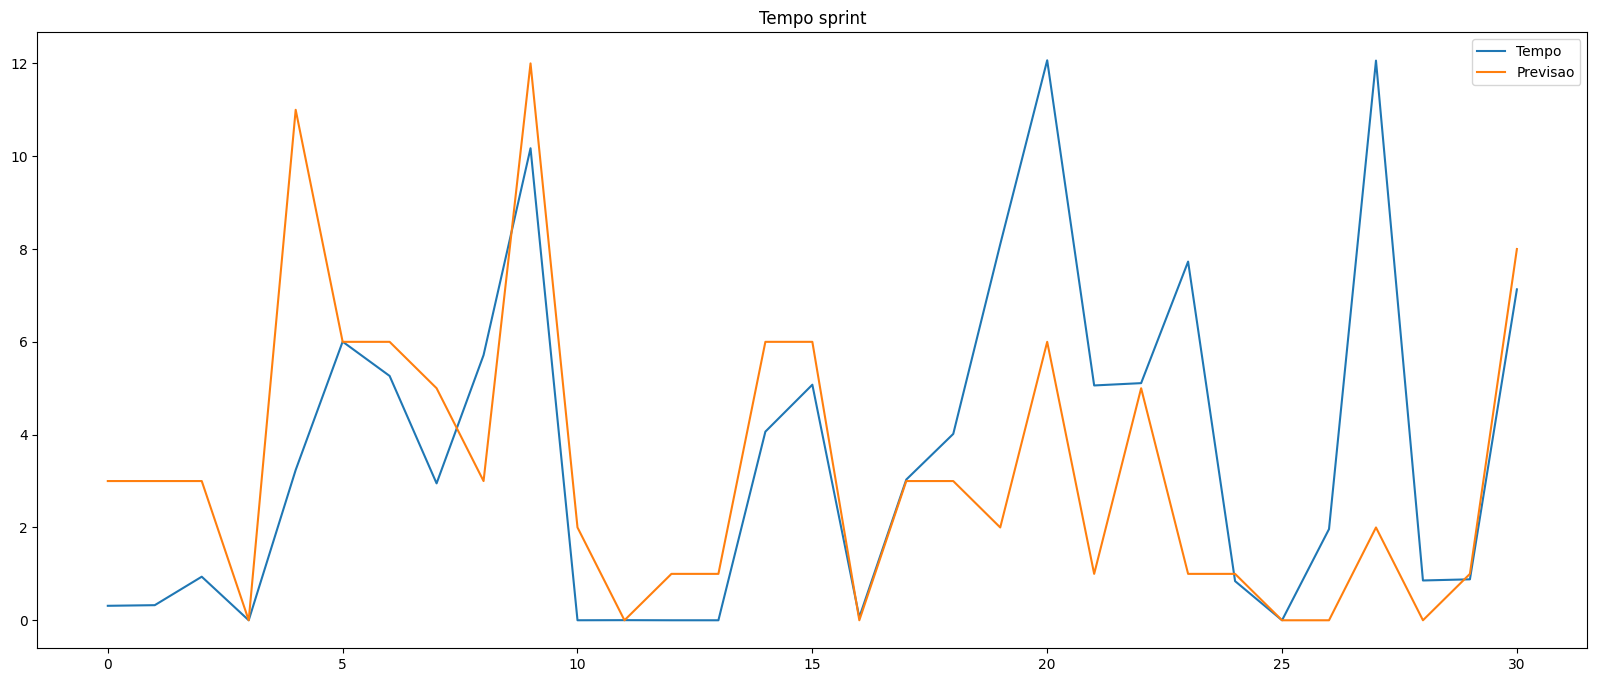

In [328]:
y_teste = y_teste.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y_teste, label='Tempo')
ax.plot(predictions, label='Previsao')
ax.legend()
ax.set_title('Tempo sprint')

In [329]:
y_teste = np.array(y_teste)
predictions = np.array(predictions)
 
MSE = np.square(np.subtract(y_teste, predictions)).mean()
RMSE = np.sqrt(MSE)
print('RMSE:')
print(RMSE)

RMSE:
4.77770139063484


### Apresentação

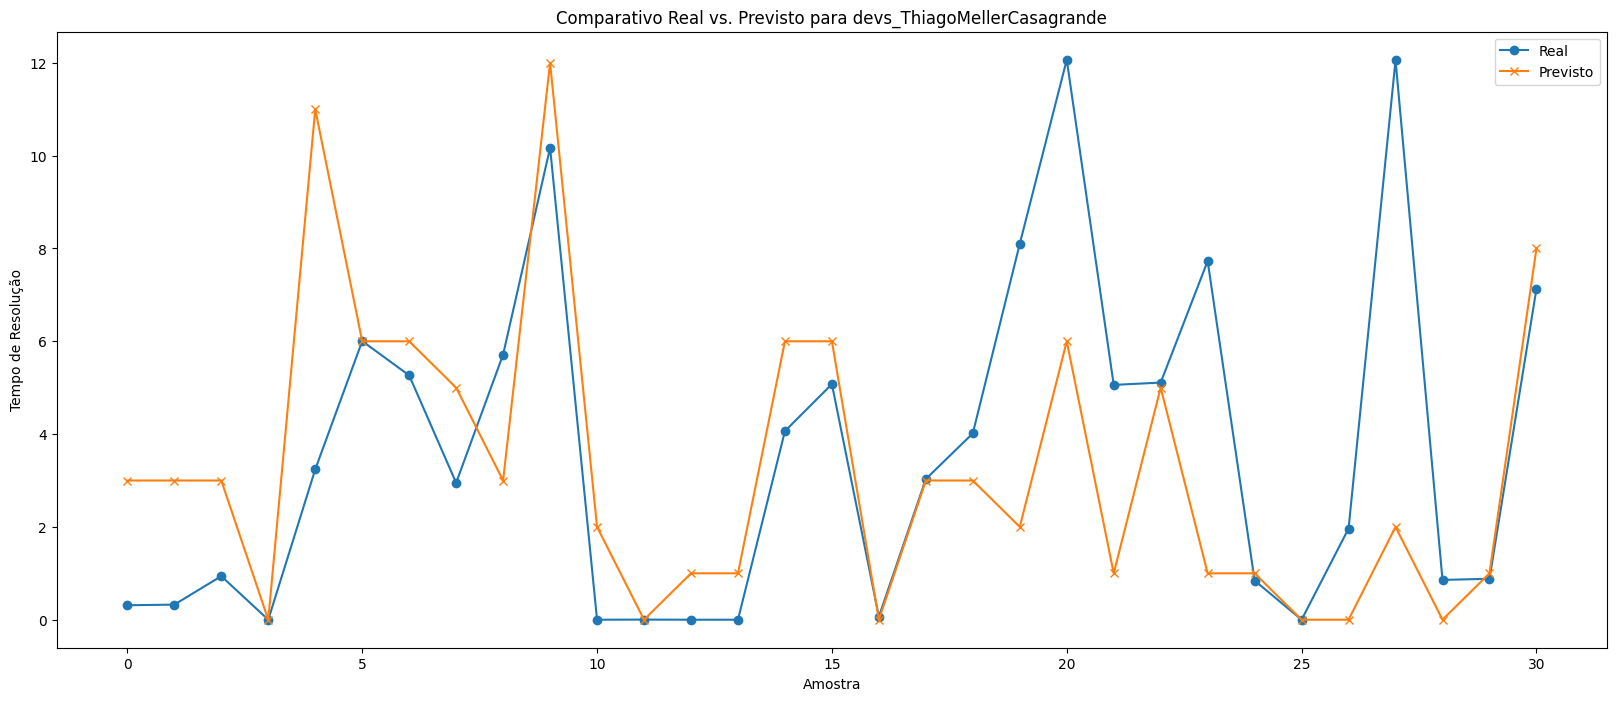

In [330]:
y_pred = model.predict(X_teste)
predictions = [round(value) for value in y_pred]

plot_comparativo_real_previsto(df_teste, y_teste, predictions, desenvolvedor)